#### Imports

In [4]:
from alice import Alice
from bob import Bob

from partial_key_recovery import attack

import sys
sys.path.append('..')

from metrics import key_recovery_metrics
from qkd import execute_qkd

import pandas as pd

#### Execute the LL20 QKD protocol

In [2]:
public, private = execute_qkd(Alice, Bob, 16, DEBUG = True)

Key exchange completed, here's the data:
Alice send pairs: {0: '1x,0z', 1: '1x,1z', 2: '1x,0z', 3: '0x,0z', 4: '0x,1z', 5: '0x,1z', 6: '1x,1z', 7: '0x,0z', 8: '1x,0z', 9: '0x,1z', 10: '1x,1z', 11: '1x,1z', 12: '1x,0z', 13: '1x,1z', 14: '1x,1z', 15: '1x,0z'}
Bob send double matchings: [2, 3, 4, 6, 9, 12, 13]
Alice send usable frames: [(2, 4), (2, 6), (2, 9), (2, 13), (4, 6), (4, 12), (4, 13), (6, 9), (6, 12), (9, 12), (9, 13), (12, 13)]
Bob send sifting string: ['01', '10', '00', '01', '11', '01', '00', '10', '10', '00', '01', '01']
Bob send measured string: ['01', '01', '00', '01', '11', '10', '11', '10', '10', '00', '01', '01']
Bob shared key: 011111011101010010101001
Alice shared key: 011111011101010010101001


#### Execute the LL20 QKD protocol and the Partial Key Recovery attack

* Error-free

In [4]:
# Assuming error-free

VALID_SS = [
    "00,00",
    "00,11",
    "01,10",
    "01,01",
    "10,01",
    "10,10",
    "11,11"
]

key_recovery_metrics(execute_qkd, Alice, Bob, 16, attack, 2, VALID_SS)

{'double_matchings': [1, 2, 3, 5, 6, 7, 8, 9, 12, 13],
 'bits_recovered': 32,
 'bits': 42,
 '%': 0.7619047619047619,
 'SS_left': ['10,01', '10,01', '01,01', '10,01', '10,01']}

* Assuming errors. Then, the Partial Key Recovery becomes a total Key Recovery

In [2]:
VALID_SS = [
    "00,11",
    "11,11"
]

key_recovery_metrics(execute_qkd, Alice, Bob, 64, attack, 2, VALID_SS, depolarize_probability = 1)

Key exchange failed, both keys are not equal. Please, try again.


{'double_matchings': [0,
  1,
  3,
  4,
  5,
  6,
  7,
  11,
  17,
  20,
  21,
  23,
  24,
  26,
  27,
  35,
  36,
  38,
  39,
  40,
  41,
  43,
  45,
  46,
  47,
  48,
  49,
  52,
  56,
  58,
  60,
  61,
  62],
 'bits_recovered': 70,
 'bits': 70,
 '%': 1.0,
 'SS_left': []}

#### Add results to dataframe

* Error-free

In [5]:
pairs = 256

VALID_SS = [
    "00,00",
    "00,11",
    "01,10",
    "01,01",
    "10,01",
    "10,10",
    "11,11"
]

try:
    df = pd.read_csv("results_error_free.csv")
except:
    file = open("results_error_free.csv", "w")
    file.write("double_matchings,bits_recovered,bits,%")
    file.close()
    df = pd.read_csv("results_error_free.csv")

while True:
    results = key_recovery_metrics(execute_qkd, Alice, Bob, pairs, attack, 2, VALID_SS)
    
    if not results: continue

    df.loc[len(df)] = [ len(results["double_matchings"]), results["bits_recovered"], results["bits"], results["%"] ]
    
    df.to_csv("results_error_free.csv", index = False)

KeyboardInterrupt: 

* Assuming errors in the quantum channel

In [6]:
pairs = 256

VALID_SS = [
    "00,11",
    "11,11"
]

try:
    df = pd.read_csv("results_error.csv")
except:
    file = open("results_error.csv", "w")
    file.write("double_matchings,bits_recovered,bits,%")
    file.close()
    df = pd.read_csv("results_error.csv")

while True:
    results = key_recovery_metrics(execute_qkd, Alice, Bob, pairs, attack, 2, VALID_SS, depolarize_probability = 1)
    
    if not results: continue

    df.loc[len(df)] = [ len(results["double_matchings"]), results["bits_recovered"], results["bits"], results["%"] ]
    
    df.to_csv("results_error.csv", index = False)

Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both keys are not equal. Please, try again.
Key exchange failed, both

KeyboardInterrupt: 

<AxesSubplot:xlabel='double_matchings', ylabel='%'>

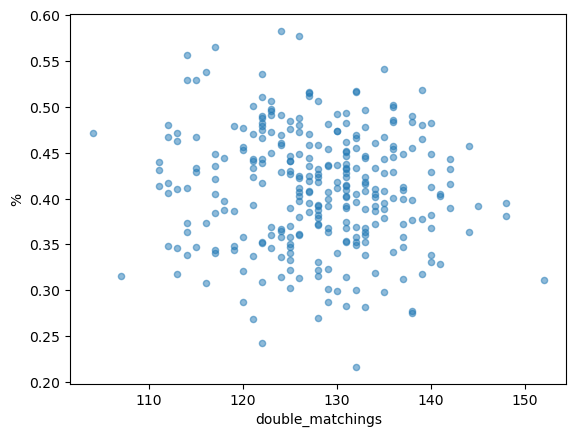

In [10]:
df = pd.read_csv("results_error_free.csv")
df.plot.scatter(x = "double_matchings", y = "%", alpha = 0.5)